<a href="https://colab.research.google.com/github/crastasanu/stock-prices-pred/blob/main/Predict_stocks_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [2]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6750661 sha256=70ba71e5b9fafe07b7384aa9b46b7b7cc1408382d8e731dbb2209bae7dcc6713
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [4]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import pandas as pd

In [58]:
data = pd.read_csv("stock_data.csv")

In [59]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,2695.889893,2682.360107,2683.729980,2695.810059,3397430000,2695.810059
1,2018-01-03,2714.370117,2697.770020,2697.850098,2713.060059,3544030000,2713.060059
2,2018-01-04,2729.290039,2719.070068,2719.310059,2723.989990,3697340000,2723.989990
3,2018-01-05,2743.449951,2727.919922,2731.330078,2743.149902,3239280000,2743.149902
4,2018-01-08,2748.510010,2737.600098,2742.669922,2747.709961,3246160000,2747.709961
...,...,...,...,...,...,...,...
1242,2022-12-07,3957.570068,3922.679932,3933.280029,3933.919922,4118050000,3933.919922
1243,2022-12-08,3974.189941,3935.830078,3947.790039,3963.510010,4006900000,3963.510010
1244,2022-12-09,3977.020020,3933.040039,3954.169922,3934.379883,3888260000,3934.379883
1245,2022-12-12,3990.709961,3935.300049,3939.290039,3990.560059,3904130000,3990.560059


In [60]:
data = data[["Date","Close"]]

In [61]:
data

,Date,Close
0,2018-01-02,2695.810059
1,2018-01-03,2713.060059
2,2018-01-04,2723.989990
3,2018-01-05,2743.149902
4,2018-01-08,2747.709961
...,...,...
1242,2022-12-07,3933.919922
1243,2022-12-08,3963.510010
1244,2022-12-09,3934.379883
1245,2022-12-12,3990.560059


In [62]:
data.columns = ["ds", "y"]

In [63]:
data

,ds,y
0,2018-01-02,2695.810059
1,2018-01-03,2713.060059
2,2018-01-04,2723.989990
3,2018-01-05,2743.149902
4,2018-01-08,2747.709961
...,...,...
1242,2022-12-07,3933.919922
1243,2022-12-08,3963.510010
1244,2022-12-09,3934.379883
1245,2022-12-12,3990.560059


In [47]:
from fbprophet import Prophet

In [64]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

In [67]:
future_dates = prophet.make_future_dataframe(periods=120)
predictions = prophet.predict(future_dates)

In [68]:
from fbprophet.plot import plot_plotly

plot_plotly(prophet, predictions)

In [51]:
unknown_data = data.iloc[-90:]
data = data.iloc[:-90]

In [52]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

future_dates = prophet.make_future_dataframe(periods=365)
predictions = prophet.predict(future_dates)

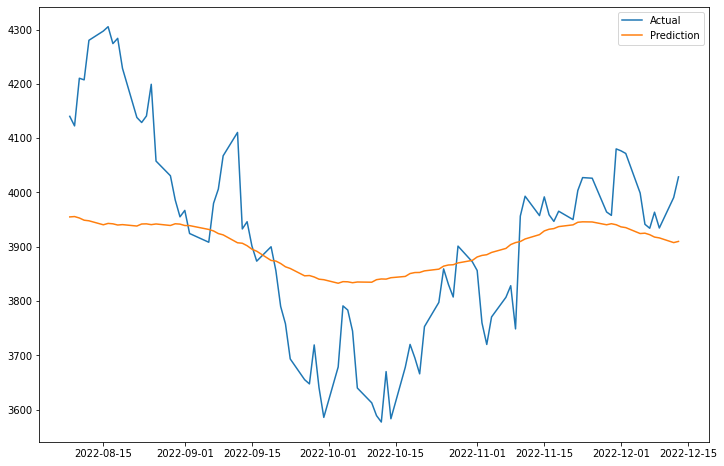

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

plt.plot(pd.to_datetime(unknown_data['ds']), unknown_data['y'], label="Actual")
plt.plot(pd.to_datetime(unknown_data['ds']), pred['yhat'], label="Prediction")

plt.legend()